In [1]:
import os
import sys
import shutil
import dotenv
from   dotenv import find_dotenv, load_dotenv
import matplotlib
load_dotenv(find_dotenv())
PATH_P     = os.environ['PATH_P']
os.chdir(PATH_P)
sys.path.insert(0, PATH_P)
import pandas as pd
from src.dst.outputhandler.pickle import tic,toc,pickle_save_,pickle_load
from src.dst.plots.plots import plotting_tool,retrieve_data,SeabornFig2Grid
from src.visualization.vis_LSTM_p.main import main_visualize
import  numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
from src.visualization.vis_LSTM_p.main import main_visualize
from src.models.CMA_ES.CMA_ES import CMA_ES

## experiments

In [2]:
path                                  =  './models/test_shuffle/hallway/DEEP2/bayes_opt/'
RD                                    = retrieve_data()
data,dict_,path_best,hist             = RD.get_best_D1(path)
data['df_t_val_train']                = pd.concat([data['df_t_train'],data['df_t_val']])
AUC_v_a                               = RD.get_all(path,'AUC_v')

val_loss_a                            = RD.get_all(path,'val_f')
dict_['AUC_v']                        = data['AUC_v']

RD.print_dict(dict_)

str_list                              = data['path_o'].split('/')
data['path_o']                        = path_best
BO_vis                                = plotting_tool(dict_)

lr           : 0.0031735
time_dim     : 24
encoder      : [415, 106]
decoder      : [226]
vector       : 415
AUC_v        : 0.7189346113749565


In [3]:
def return_dict():
    dict_c = {
        'path_i'   : './models/bayes_opt/DEEP2/',
        'path_save': './models/CMA_ES/DEEP2/',

        'resolution_AUC': 1000,

        ###### CMA_ES    ######
        'CMA_ES': True,
        'verbose_CMA': 1,
        'verbose_CMA_log': 0,
        'evals': 21*150,
        'bounds': [-100., 100.],
        'sigma': 0.4222222222222225,
        'progress_ST': 0.3,
        'popsize'    : 21,
        
        'mode'       : 'linear',

        'epoch': 0

    }

    return dict_c

## plus min sigmoid

In [20]:
dict_c = return_dict()
dict_c['mode']   = 'sigmoid'
dict_c['bounds'] = [-100,100]
path   = path_best.replace('bayes_opt','CMA_ES/pos_min_sigmoid')
CMA_ES(dict_c).main(data,path,dict_)

(10_w,21)-aCMA-ES (mu_w=6.2,w_1=27%) in dimension 360 (seed=485373, Thu Jun  7 17:16:19 2018)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     21 -7.530280578552331e-01 1.0e+00 4.15e-01  4e-01  4e-01 1:05.1
    2     42 -7.573527043133719e-01 1.0e+00 4.09e-01  4e-01  4e-01 1:13.5
    3     63 -7.604733756402409e-01 1.0e+00 4.03e-01  4e-01  4e-01 1:21.8
    4     84 -7.652973295106787e-01 1.0e+00 3.98e-01  4e-01  4e-01 1:30.8
    5    105 -7.688166414328512e-01 1.0e+00 3.94e-01  4e-01  4e-01 1:38.4
    6    126 -7.744016364397771e-01 1.0e+00 3.90e-01  4e-01  4e-01 1:46.1
    7    147 -7.741841961150662e-01 1.0e+00 3.87e-01  4e-01  4e-01 1:55.4
    8    168 -7.751505975582257e-01 1.0e+00 3.83e-01  4e-01  4e-01 2:03.7
    9    189 -7.777155880552782e-01 1.0e+00 3.81e-01  4e-01  4e-01 2:13.6
   10    210 -7.815973005186354e-01 1.0e+00 3.78e-01  4e-01  4e-01 2:21.1
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
   11    231 -7.854548

  100   2100 -9.324404857777923e-01 1.2e+00 5.06e-01  5e-01  5e-01 23:42.6
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
  101   2121 -9.330324066617273e-01 1.2e+00 5.07e-01  5e-01  5e-01 24:49.7
  102   2142 -9.343612086460716e-01 1.2e+00 5.09e-01  5e-01  5e-01 24:58.1
  103   2163 -9.330444866797667e-01 1.2e+00 5.10e-01  5e-01  5e-01 25:06.1
  104   2184 -9.334310472570306e-01 1.2e+00 5.12e-01  5e-01  5e-01 25:14.5
  105   2205 -9.352269432722353e-01 1.2e+00 5.13e-01  5e-01  5e-01 25:24.8
  106   2226 -9.364872918210224e-01 1.2e+00 5.15e-01  5e-01  5e-01 25:33.8
  107   2247 -9.354604902876655e-01 1.2e+00 5.17e-01  5e-01  5e-01 25:44.0
  108   2268 -9.360363044808815e-01 1.2e+00 5.18e-01  5e-01  5e-01 25:54.6
  109   2289 -9.371033727410367e-01 1.2e+00 5.20e-01  5e-01  5e-01 26:04.5
  110   2310 -9.380013207486390e-01 1.2e+00 5.22e-01  5e-01  5e-01 26:12.8
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
  111   2331 -9.370792127049575

In [21]:
df    = pickle_load(path+'best/df.p', None)
data  = pickle_load(path+'best/data_best.p', None)
dict_ = pickle_load(path+'dict.p', None)

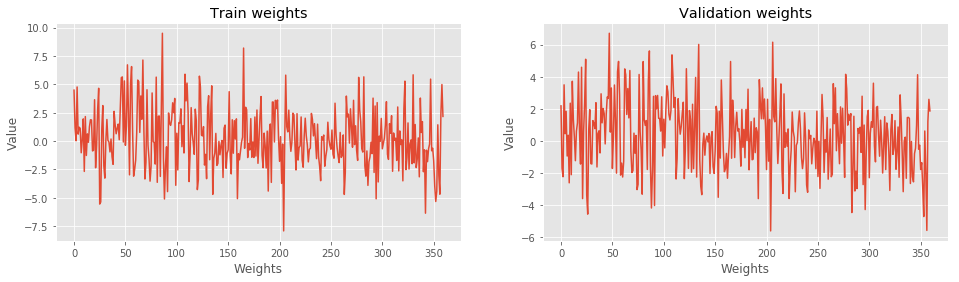

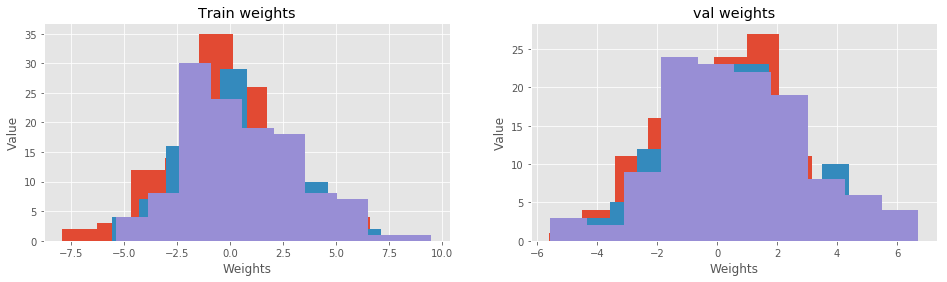

In [22]:
BO_vis.plot_weigths(data['x_tr'],data['x_v'])

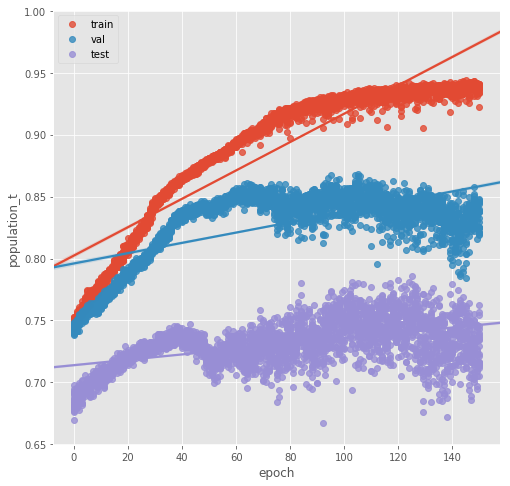

In [23]:
# Set up the figure
f, ax = plt.subplots(figsize=(8, 8))
ax = sns.regplot(df.epoch, df.population_tr,label = 'train')
ax = sns.regplot(df.epoch, df.population_v,label = 'val')
ax = sns.regplot(df.epoch, df.population_t,label = 'test')
plt.legend()

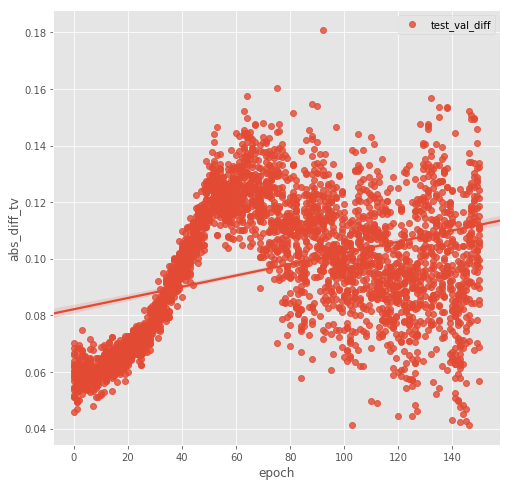

In [24]:
f, ax = plt.subplots(figsize=(8, 8))
ax = sns.regplot(df.epoch, df.abs_diff_tv,label = 'test_val_diff')
plt.legend()

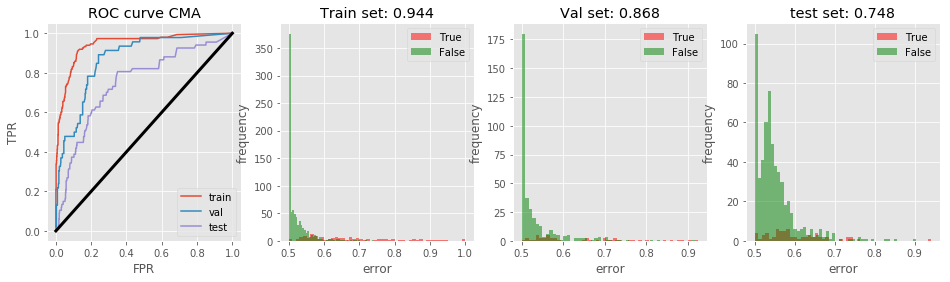

In [25]:
BO_vis.plot_cma(data)

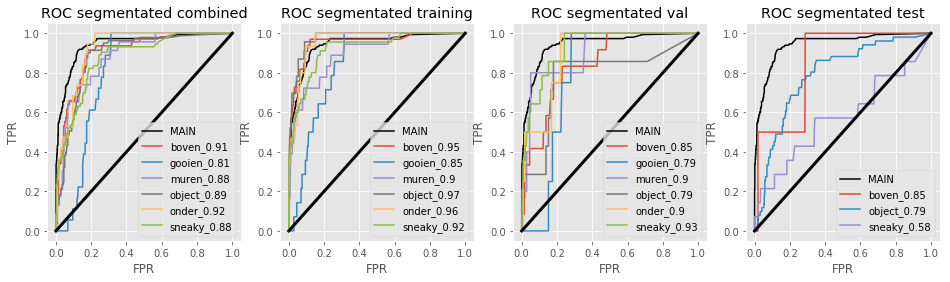

In [26]:
data['path_o'] = data['dict_config']['path_save']
BO_vis.save_ROC_segment(data,'segmentation',cma = True)

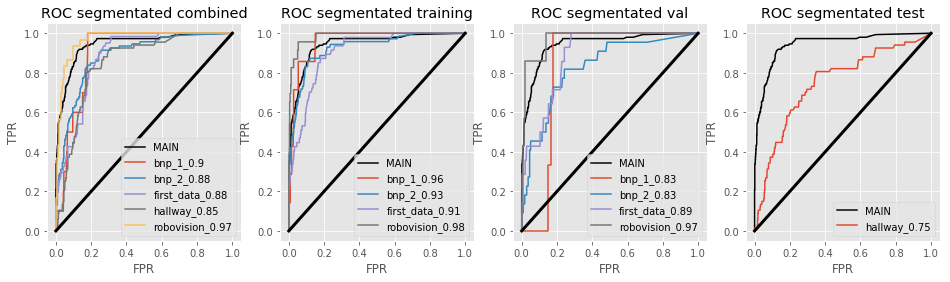

In [27]:
data['path_o'] = data['dict_config']['path_save']
BO_vis.save_ROC_segment(data,'location',cma = True)

## plus sigmoid

In [28]:
dict_c = return_dict()
dict_c['mode']   = 'sigmoid'
dict_c['bounds'] = [0,100]
path   = path_best.replace('bayes_opt','CMA_ES/pos_sigmoid')
CMA_ES(dict_c).main(data,path,dict_)

(10_w,21)-aCMA-ES (mu_w=6.2,w_1=27%) in dimension 360 (seed=571012, Thu Jun  7 17:54:56 2018)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     21 -7.540548593885901e-01 1.0e+00 4.15e-01  4e-01  4e-01 1:03.5
    2     42 -7.584801726637245e-01 1.0e+00 4.09e-01  4e-01  4e-01 1:11.8
    3     63 -7.624947653255163e-01 1.0e+00 4.03e-01  4e-01  4e-01 1:20.2
    4     84 -7.643832748123571e-01 1.0e+00 3.99e-01  4e-01  4e-01 1:28.0
    5    105 -7.664851979512290e-01 1.0e+00 3.94e-01  4e-01  4e-01 1:35.1
    6    126 -7.672824791418356e-01 1.0e+00 3.90e-01  4e-01  4e-01 1:43.4
    7    147 -7.722997133009052e-01 1.0e+00 3.86e-01  4e-01  4e-01 1:51.1
    8    168 -7.744016364397771e-01 1.0e+00 3.83e-01  4e-01  4e-01 1:58.9
    9    189 -7.770672937538253e-01 1.0e+00 3.80e-01  4e-01  4e-01 2:07.1
   10    210 -7.799544180652643e-01 1.0e+00 3.77e-01  4e-01  4e-01 2:15.4
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
   11    231 -7.823422

Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
  101   2121 -8.319951357794028e-01 1.2e+00 3.80e-01  4e-01  4e-01 18:07.5
  102   2142 -8.322407628128725e-01 1.2e+00 3.80e-01  4e-01  4e-01 18:12.4
  103   2163 -8.320273491608415e-01 1.2e+00 3.80e-01  4e-01  4e-01 18:16.7
  104   2184 -8.314555616403053e-01 1.2e+00 3.80e-01  4e-01  4e-01 18:22.2
  105   2205 -8.316407885835777e-01 1.2e+00 3.81e-01  4e-01  4e-01 18:28.6
  106   2226 -8.311696678800374e-01 1.2e+00 3.81e-01  4e-01  4e-01 18:34.6
  107   2247 -8.313750281867087e-01 1.2e+00 3.81e-01  4e-01  4e-01 18:39.3
  108   2268 -8.310609477176820e-01 1.2e+00 3.81e-01  4e-01  4e-01 18:44.9
  109   2289 -8.315763618207003e-01 1.2e+00 3.81e-01  4e-01  4e-01 18:50.4
  110   2310 -8.333561511451858e-01 1.2e+00 3.81e-01  4e-01  4e-01 18:56.8
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
  111   2331 -8.326273233901362e-01 1.2e+00 3.82e-01  4e-01  4e-01 19:37.3
  112   2352 -8.319186289984860

In [29]:
df    = pickle_load(path+'best/df.p', None)
data  = pickle_load(path+'best/data_best.p', None)
dict_ = pickle_load(path+'dict.p', None)

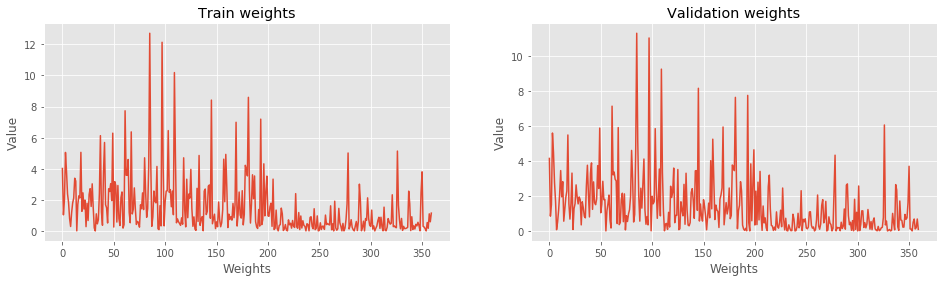

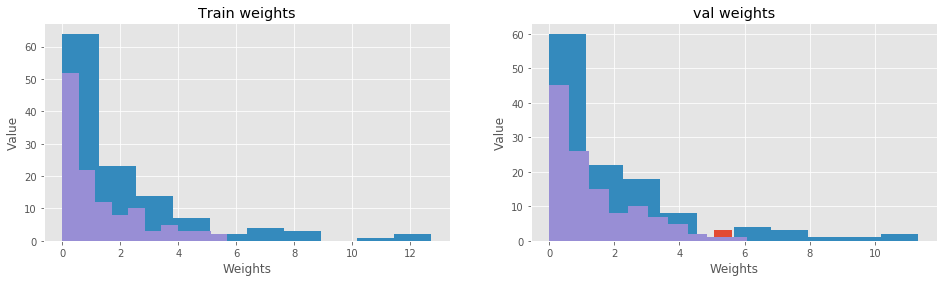

In [30]:
BO_vis.plot_weigths(data['x_tr'],data['x_v'])

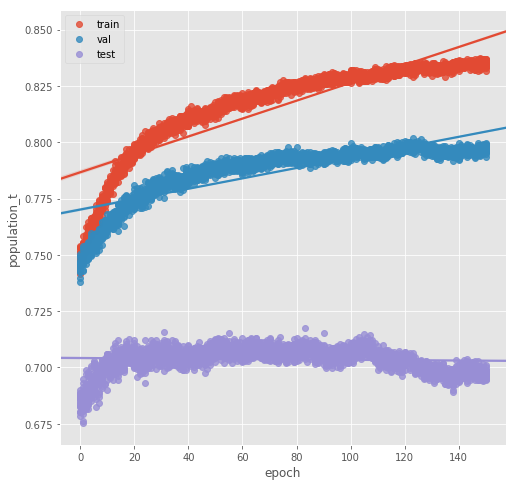

In [31]:
# Set up the figure
f, ax = plt.subplots(figsize=(8, 8))
ax = sns.regplot(df.epoch, df.population_tr,label = 'train')
ax = sns.regplot(df.epoch, df.population_v,label = 'val')
ax = sns.regplot(df.epoch, df.population_t,label = 'test')
plt.legend()

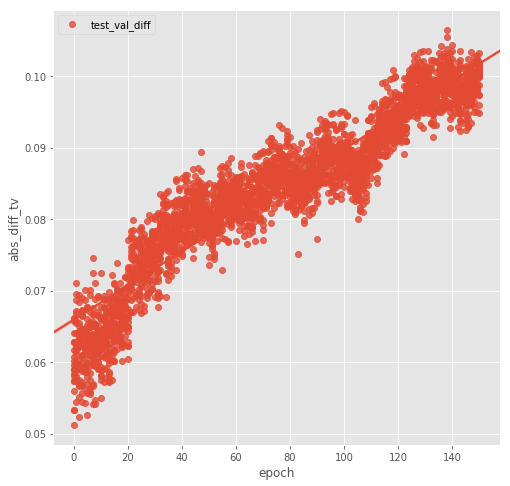

In [32]:
f, ax = plt.subplots(figsize=(8, 8))
ax = sns.regplot(df.epoch, df.abs_diff_tv,label = 'test_val_diff')
plt.legend()

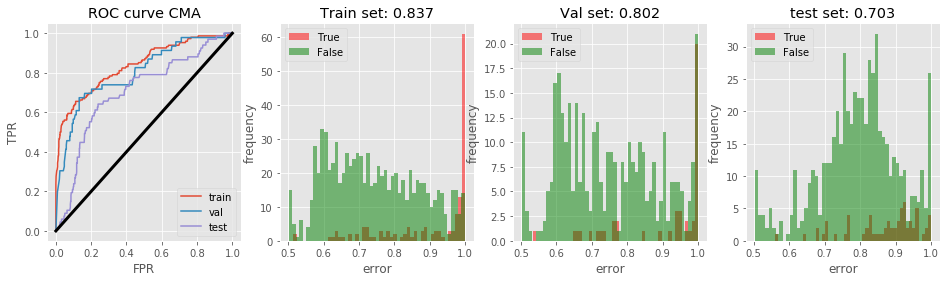

In [33]:
BO_vis.plot_cma(data)

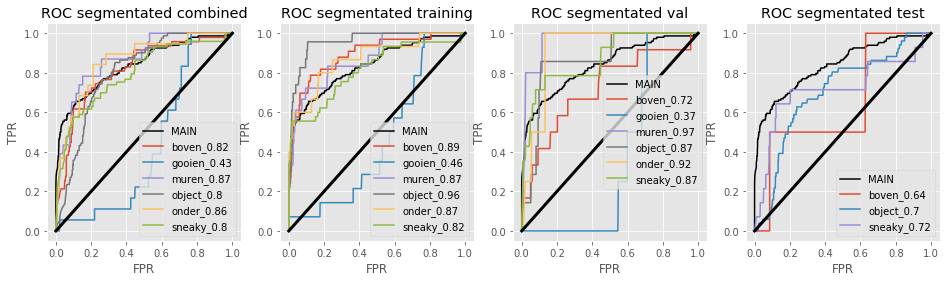

In [34]:
data['path_o'] = data['dict_config']['path_save']
BO_vis.save_ROC_segment(data,'segmentation',cma = True)

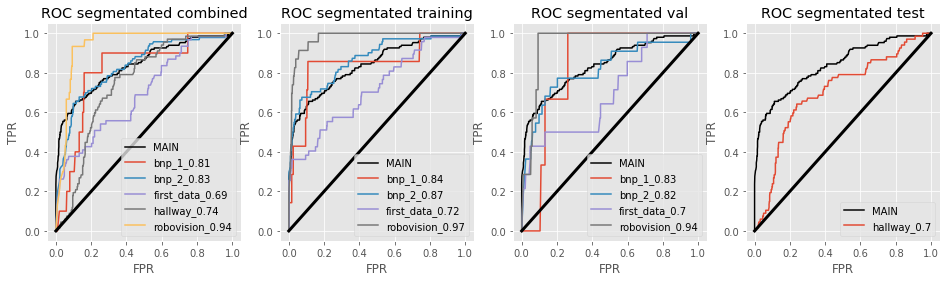

In [35]:
data['path_o'] = data['dict_config']['path_save']
BO_vis.save_ROC_segment(data,'location',cma = True)

## plus leaky relu

In [36]:
dict_c = return_dict()
dict_c['mode']   = 'leaky_relu'
dict_c['bounds'] = [0,100]
path   = path_best.replace('bayes_opt','CMA_ES/pos_leaky_relu')
CMA_ES(dict_c).main(data,path,dict_)

(10_w,21)-aCMA-ES (mu_w=6.2,w_1=27%) in dimension 360 (seed=516845, Thu Jun  7 18:21:58 2018)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     21 -7.551944077569823e-01 1.0e+00 4.15e-01  4e-01  4e-01 1:10.8
    2     42 -7.590358534935411e-01 1.0e+00 4.09e-01  4e-01  4e-01 1:24.1
    3     63 -7.625430853976741e-01 1.0e+00 4.03e-01  4e-01  4e-01 1:38.2
    4     84 -7.649027155880553e-01 1.0e+00 3.98e-01  4e-01  4e-01 1:52.8
    5    105 -7.677334664819766e-01 1.0e+00 3.94e-01  4e-01  4e-01 2:05.8
    6    126 -7.713051251489870e-01 1.0e+00 3.90e-01  4e-01  4e-01 2:20.2
    7    147 -7.755774248622878e-01 1.0e+00 3.86e-01  4e-01  4e-01 2:33.6
    8    168 -7.755371581354895e-01 1.0e+00 3.83e-01  4e-01  4e-01 2:47.4
    9    189 -7.805382856038400e-01 1.0e+00 3.79e-01  4e-01  4e-01 3:00.8
   10    210 -7.820925812582546e-01 1.0e+00 3.77e-01  4e-01  4e-01 3:15.3
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
   11    231 -7.843112

  100   2100 -8.327883902973295e-01 1.1e+00 3.58e-01  4e-01  4e-01 32:16.0
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
  101   2121 -8.334165512353831e-01 1.2e+00 3.59e-01  4e-01  4e-01 33:19.9
  102   2142 -8.321602293592758e-01 1.2e+00 3.59e-01  4e-01  4e-01 33:30.8
  103   2163 -8.336823116322520e-01 1.2e+00 3.59e-01  4e-01  4e-01 33:40.0
  104   2184 -8.343950326965821e-01 1.2e+00 3.59e-01  4e-01  4e-01 33:51.2
  105   2205 -8.341010855909545e-01 1.2e+00 3.59e-01  4e-01  4e-01 34:01.1
  106   2226 -8.336339915600941e-01 1.2e+00 3.59e-01  4e-01  4e-01 34:12.5
  107   2247 -8.345480462584158e-01 1.2e+00 3.58e-01  4e-01  4e-01 34:24.7
  108   2268 -8.351601005057501e-01 1.2e+00 3.58e-01  4e-01  4e-01 34:37.2
  109   2289 -8.342822858615470e-01 1.2e+00 3.58e-01  4e-01  4e-01 34:50.8
  110   2310 -8.368553297039591e-01 1.2e+00 3.58e-01  4e-01  4e-01 35:03.1
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
  111   2331 -8.352446606320266

In [37]:
df    = pickle_load(path+'best/df.p', None)
data  = pickle_load(path+'best/data_best.p', None)
dict_ = pickle_load(path+'dict.p', None)

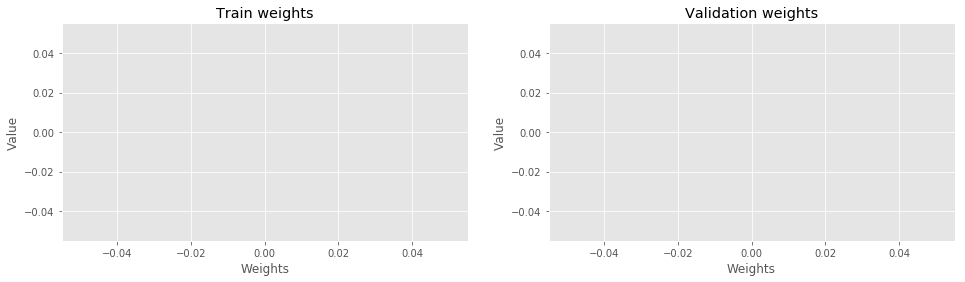

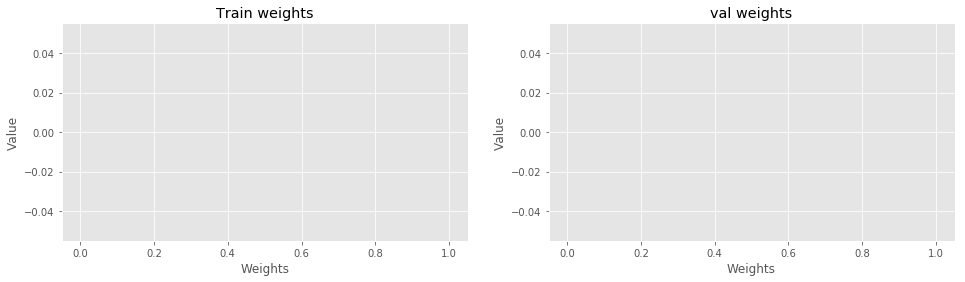

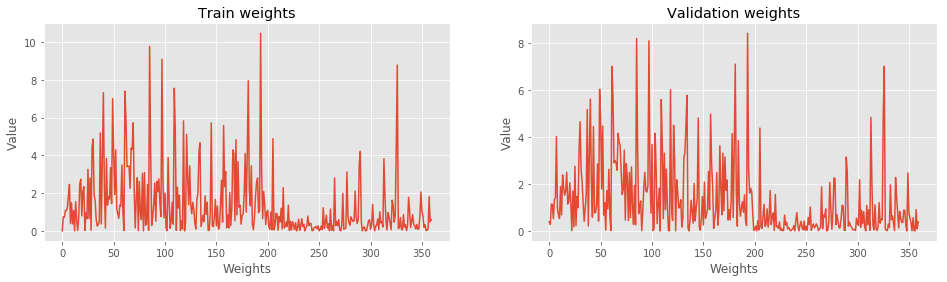

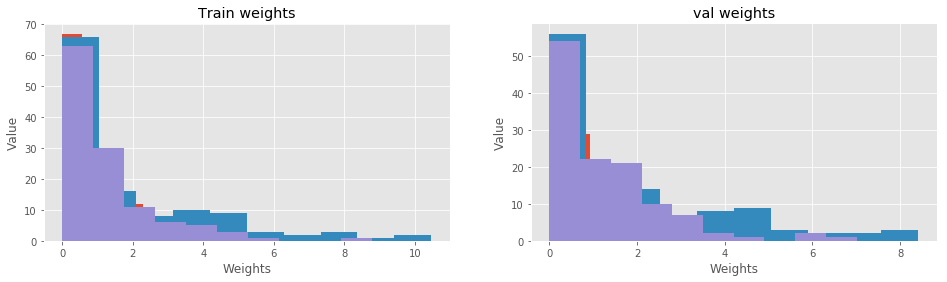

In [38]:
BO_vis.plot_weigths(data['x_tr'][360:],data['x_v'][360:])
BO_vis.plot_weigths(data['x_tr'][:360],data['x_v'][:360])

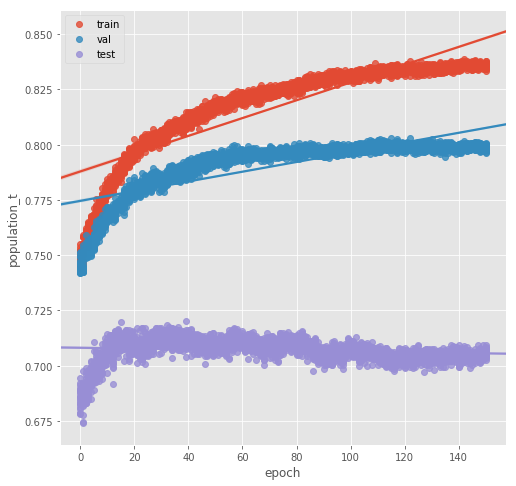

In [39]:
# Set up the figure
f, ax = plt.subplots(figsize=(8, 8))
ax = sns.regplot(df.epoch, df.population_tr,label = 'train')
ax = sns.regplot(df.epoch, df.population_v,label = 'val')
ax = sns.regplot(df.epoch, df.population_t,label = 'test')
plt.legend()

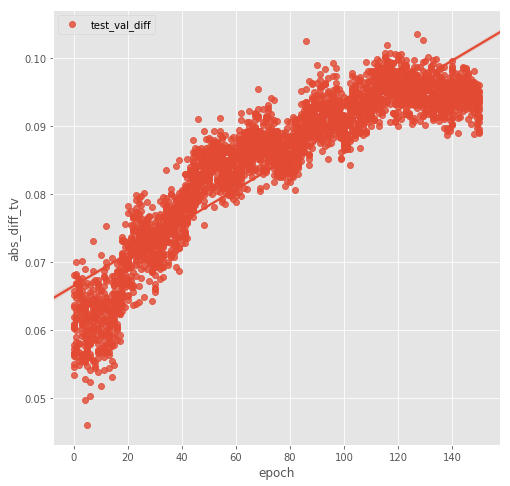

In [40]:
f, ax = plt.subplots(figsize=(8, 8))
ax = sns.regplot(df.epoch, df.abs_diff_tv,label = 'test_val_diff')
plt.legend()

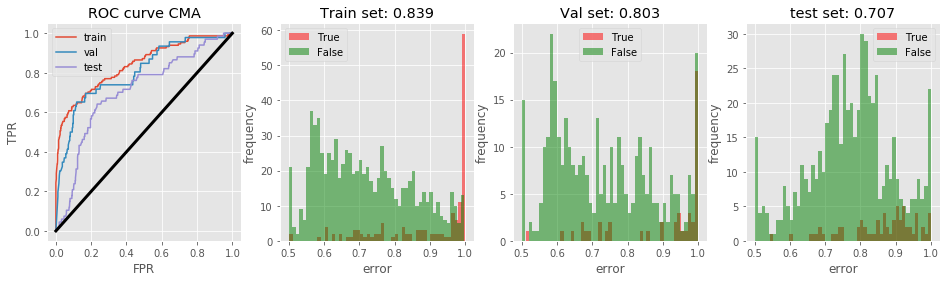

In [41]:
BO_vis.plot_cma(data)

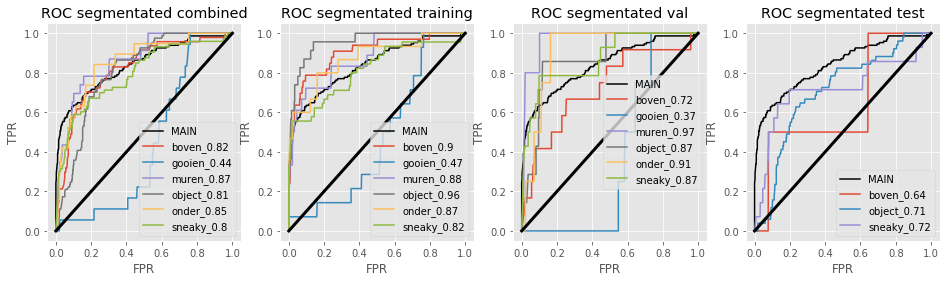

In [42]:
data['path_o'] = data['dict_config']['path_save']
BO_vis.save_ROC_segment(data,'segmentation',cma = True)

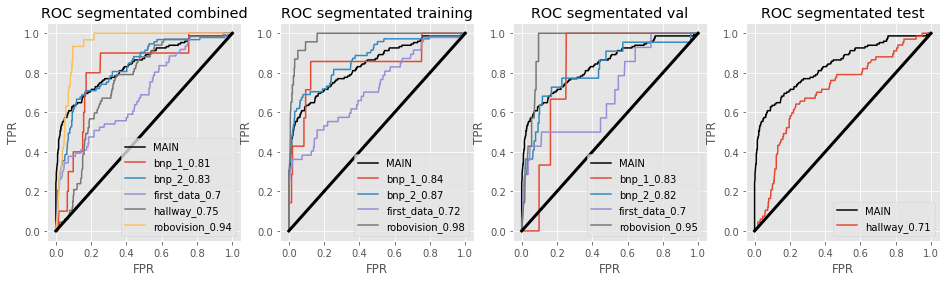

In [43]:
data['path_o'] = data['dict_config']['path_save']
BO_vis.save_ROC_segment(data,'location',cma = True)

## plus min leaky relu

In [44]:
dict_c = return_dict()
dict_c['mode']   = 'leaky_relu'
dict_c['bounds'] = [-100,100]
path   = path_best.replace('bayes_opt','CMA_ES/pos_min_leaky_relu')
CMA_ES(dict_c).main(data,path,dict_)

(10_w,21)-aCMA-ES (mu_w=6.2,w_1=27%) in dimension 360 (seed=502244, Thu Jun  7 19:08:35 2018)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     21 -7.536642721386464e-01 1.0e+00 4.15e-01  4e-01  4e-01 0:57.8
    2     42 -7.576667847823986e-01 1.0e+00 4.09e-01  4e-01  4e-01 1:07.3
    3     63 -7.597888412846696e-01 1.0e+00 4.03e-01  4e-01  4e-01 1:19.8
    4     84 -7.628772992301002e-01 1.0e+00 3.98e-01  4e-01  4e-01 1:32.1
    5    105 -7.642665013046419e-01 1.0e+00 3.93e-01  4e-01  4e-01 1:43.0
    6    126 -7.672542924330769e-01 1.0e+00 3.89e-01  4e-01  4e-01 1:54.0
    7    147 -7.715306188190574e-01 1.0e+00 3.85e-01  4e-01  4e-01 2:05.6
    8    168 -7.751465708855459e-01 1.0e+00 3.82e-01  4e-01  4e-01 2:16.2
    9    189 -7.769102535193120e-01 1.0e+00 3.79e-01  4e-01  4e-01 2:28.2
   10    210 -7.802443384982122e-01 1.0e+00 3.76e-01  4e-01  4e-01 2:39.5
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
   11    231 -7.850562

  100   2100 -9.401555906323487e-01 1.2e+00 5.01e-01  5e-01  5e-01 25:58.0
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
  101   2121 -9.413233257094996e-01 1.2e+00 5.02e-01  5e-01  5e-01 26:52.4
  102   2142 -9.405179911735335e-01 1.2e+00 5.04e-01  5e-01  5e-01 27:02.8
  103   2163 -9.389395354830398e-01 1.2e+00 5.05e-01  5e-01  5e-01 27:13.5
  104   2184 -9.418951132300357e-01 1.2e+00 5.07e-01  5e-01  5e-01 27:25.0
  105   2205 -9.421528202815449e-01 1.2e+00 5.08e-01  5e-01  5e-01 27:35.9
  106   2226 -9.407998582611218e-01 1.2e+00 5.10e-01  5e-01  5e-01 27:47.1
  107   2247 -9.428735946912349e-01 1.2e+00 5.11e-01  5e-01  5e-01 27:57.2
  108   2268 -9.421930870083433e-01 1.2e+00 5.12e-01  5e-01  5e-01 28:08.3
  109   2289 -9.424991141320104e-01 1.2e+00 5.14e-01  5e-01  5e-01 28:18.5
  110   2310 -9.432641819411784e-01 1.2e+00 5.15e-01  5e-01  5e-01 28:28.4
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
  111   2331 -9.433890087942530

In [45]:
df    = pickle_load(path+'best/df.p', None)
data  = pickle_load(path+'best/data_best.p', None)
dict_ = pickle_load(path+'dict.p', None)

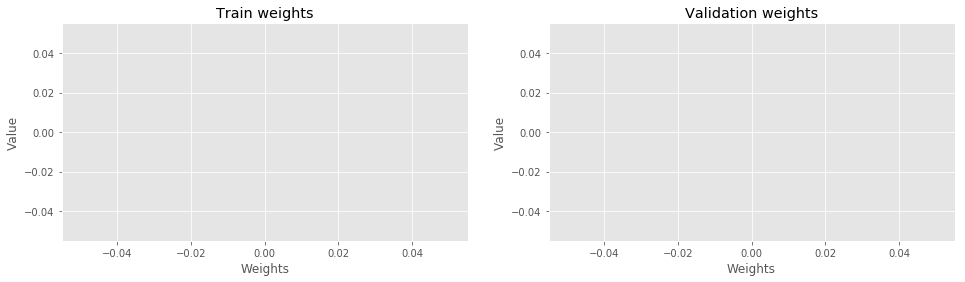

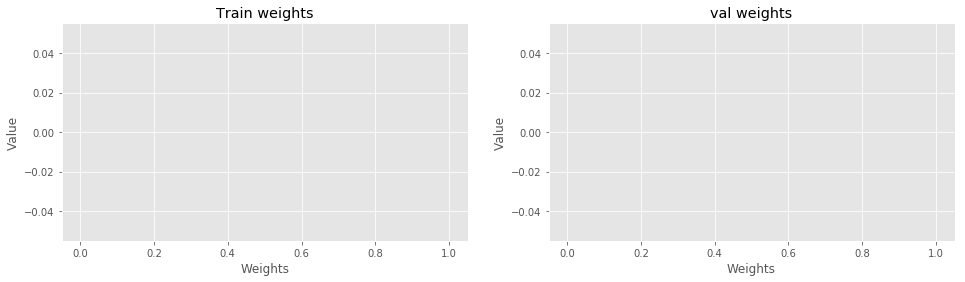

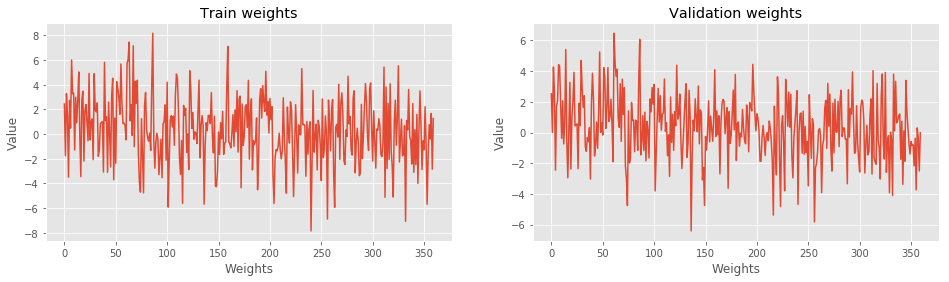

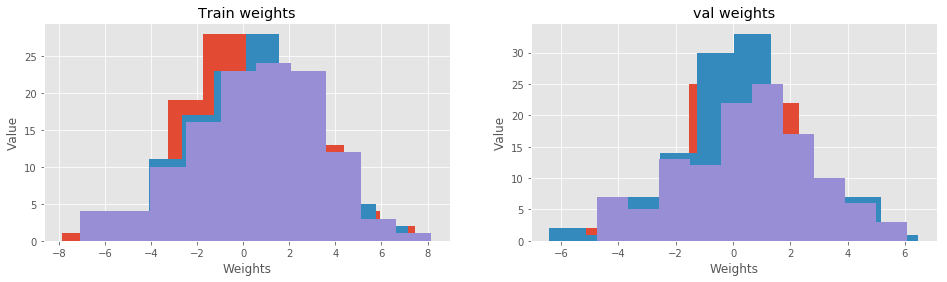

In [46]:
BO_vis.plot_weigths(data['x_tr'][360:],data['x_v'][360:])
BO_vis.plot_weigths(data['x_tr'][:360],data['x_v'][:360])

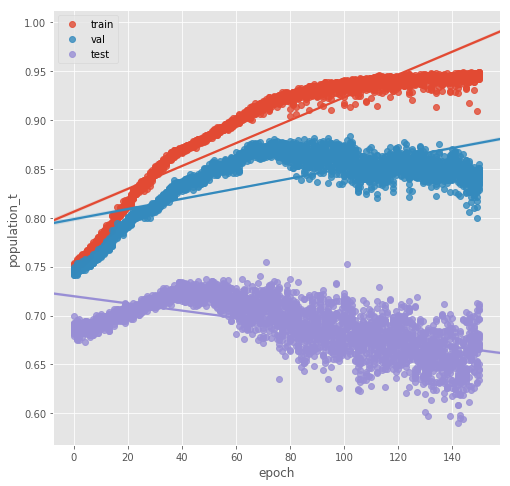

In [47]:
# Set up the figure
f, ax = plt.subplots(figsize=(8, 8))
ax = sns.regplot(df.epoch, df.population_tr,label = 'train')
ax = sns.regplot(df.epoch, df.population_v,label = 'val')
ax = sns.regplot(df.epoch, df.population_t,label = 'test')
plt.legend()

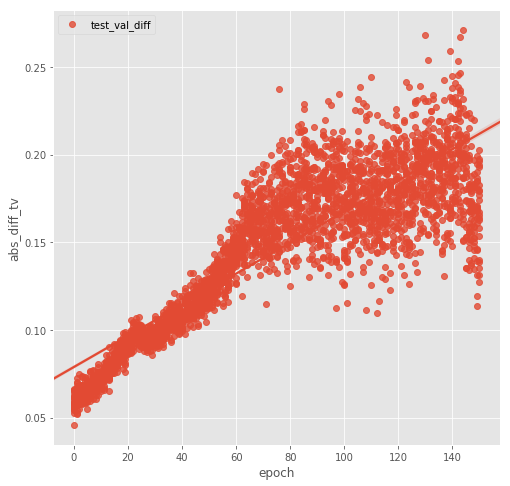

In [48]:
f, ax = plt.subplots(figsize=(8, 8))
ax = sns.regplot(df.epoch, df.abs_diff_tv,label = 'test_val_diff')
plt.legend()

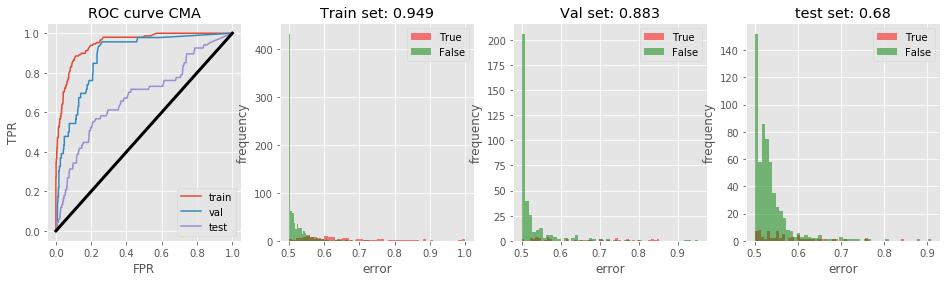

In [49]:
BO_vis.plot_cma(data)

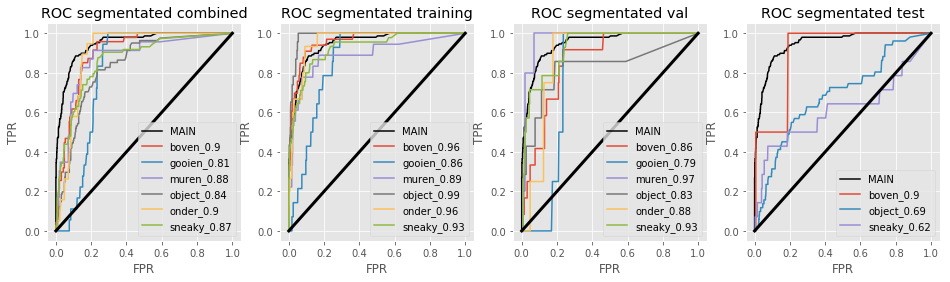

In [50]:
data['path_o'] = data['dict_config']['path_save']
BO_vis.save_ROC_segment(data,'segmentation',cma = True)

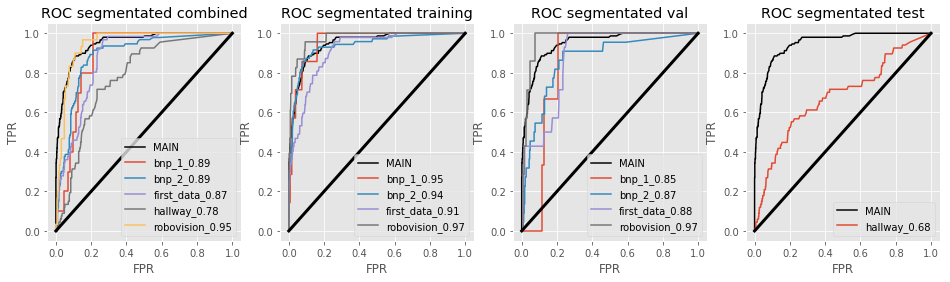

In [51]:
data['path_o'] = data['dict_config']['path_save']
BO_vis.save_ROC_segment(data,'location',cma = True)

# DEEP2

In [52]:
# path                                  =  './models/CMA_ES/DEEP2/'
# path_a                                = [path]
# RD                                    = retrieve_data()
# df,dict_,path_best                    = RD.get_max_CMA(path)


# BO_vis                                = plotting_tool(dict_['dict_config'])

# df                                     = df[df['epoch'] < 150]
# array_AUC_tr_a                         = RD.get_all_cma(path_a,'AUC_tr')
# array_AUC_v_a                          = RD.get_all_cma(path_a,'AUC_v')
# array_AUC_t_a                          = RD.get_all_cma(path_a,'AUC_t')

NameError: name 'array_AUC_tr_a' is not defined

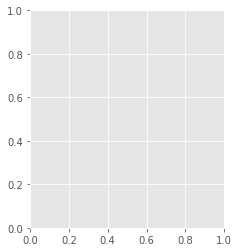

In [53]:
fig = plt.figure(figsize=(16,4))

ax1 = plt.subplot(141)
ax1 = plt.hist(array_AUC_tr_a)

ax2 = plt.subplot(142)
ax2 = plt.hist(array_AUC_v_a)

ax3 = plt.subplot(143)
ax3 = plt.hist(array_AUC_t_a)


ax4 = plt.subplot(144)
ax4 = plt.plot(array_AUC_tr_a,label = 'train')
ax4 = plt.plot(array_AUC_v_a,label = 'val')
ax4 = plt.plot(array_AUC_t_a,label = 'test')
plt.legend()
plt.show()


In [ ]:
BO_vis.plot_weigths(dict_['x_tr'],dict_['x_v'])

In [ ]:
# Set up the figure
f, ax = plt.subplots(figsize=(8, 8))



ax = sns.regplot(df.epoch, df.population_tr,label = 'train')
ax = sns.regplot(df.epoch, df.population_v,label = 'val')
ax = sns.regplot(df.epoch, df.population_t,label = 'test')
plt.legend()
plt.savefig('./plots/pic/CMA_training')

In [ ]:
BO_vis.plot_cma(dict_)

In [ ]:
dict_['path_o'] = dict_['dict_config']['path_save']
BO_vis.save_ROC_segment(dict_,'segmentation',cma = True)

In [ ]:
dict_['path_o'] = dict_['dict_config']['path_save']
BO_vis.save_ROC_segment(dict_,'location',cma = True)

In [ ]:
# dict_c = {
#         'path'       :  path_best+'/',
#         'mode'       : 'df_t_train',

#         'path_dict'  : path_best+'/dict.p',

#         'plot_mode'  : 'error'


# }
# vis = main_visualize(dict_c)
# vis.play_videos()


In [ ]:
path_best+'/dict.p'